In [1]:
import cv2 as cv

In [2]:
img = cv.imread('C:/Users/fatih.gokmenoglu/Pictures/data/replicant.jpg')

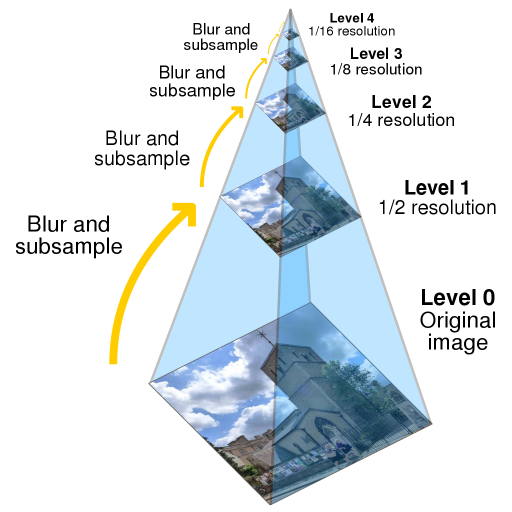

In [3]:
# pyrDown first convolves the input image with a 5x5 Gaussian kernel and then downsamples the image
# by rejecting even rows and columns
# 
# pyrUp upsamples the input image by injecting even zero rows and columns and then convolves the result
# with the 5x5 Gaussian kernel multiplied by 4
#

while True:
    rows, cols, _channels = map(int, img.shape)
    cv.imshow('Replicants', img)
    key = cv.waitKey(0)
    
    if key == 27: # ESC
        break
    elif chr(key) == 'i': # Zoom [i]n
        img = cv.pyrUp(img, dstsize=(2 * cols, 2 * rows))
    elif chr(key) == 'o': # Zoom [o]ut
        img = cv.pyrDown(img, dstsize=(cols // 2, rows // 2))
        
cv.destroyAllWindows()

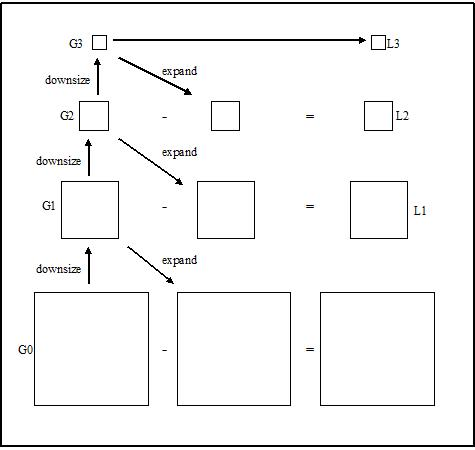

In [4]:
lower = img.copy()

gaussian_pyr = [lower]

for ii in range(3):
    lower = cv.pyrDown(lower)
    gaussian_pyr.append(lower)
    
laplacian_top = gaussian_pyr[-1]

laplacian_pyr = [laplacian_top] 

for ii in range(3, 0, -1):
    size = (gaussian_pyr[ii - 1].shape[1], gaussian_pyr[ii - 1].shape[0])
    gaussian_expanded = cv.pyrUp(gaussian_pyr[ii], dstsize=size)
    laplacian = cv.subtract(gaussian_pyr[ii - 1], gaussian_expanded)
    laplacian_pyr.append(laplacian)
    cv.imshow('lap-{}'.format(ii - 1), laplacian)
    cv.waitKey(0)

        
cv.destroyAllWindows()